In [1]:
import pyvista as pv
import random
import numpy as np
from tqdm.auto import tqdm
import imageio

/Users/mkalai/miniconda3/envs/dev/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/mkalai/miniconda3/envs/dev/lib/python3.11/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


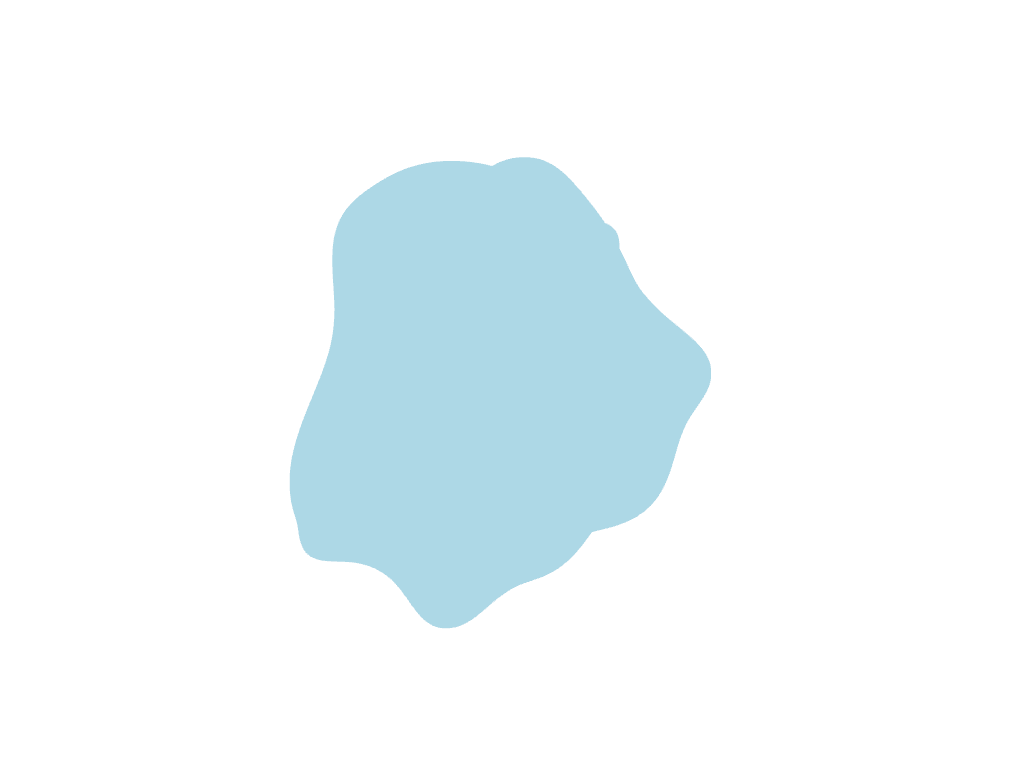

  0%|          | 0/30 [00:00<?, ?it/s]

In [2]:
# Create a PyVista point cloud (replace this with your own point cloud data)
point_cloud = pv.read("points.vtk")  # Example point cloud

p = pv.Plotter()
p.add_mesh(point_cloud)
p.show()
cpos = p.camera_position

# Get bounding box of the point cloud
bounds = point_cloud.bounds
x_min, x_max, y_min, y_max, z_min, z_max = bounds

# Function to get a random position within the bounding box
def random_position():
    x = random.uniform(x_min, x_max)
    y = random.uniform(y_min, y_max)
    z = random.uniform(z_min, z_max)
    return x, y, z

# Initialize sphere
sphere = pv.Sphere(radius=5)

# Parameters for animation
num_frames = 30  # Number of frames in the animation
position_change_speed = 2  # Speed of position change
radius_min, radius_max = 3, 10  # Range for sphere radius
radius_change_speed = 0.4  # Speed of radius change
screenshots = []

# Random initial values for movement
delta_x, delta_y, delta_z = np.random.uniform(-1, 1, 3)

# Generate animation
for i in tqdm(range(num_frames)):
    
    # Update position of the sphere
    new_x = sphere.center[0] + delta_x * position_change_speed
    new_y = sphere.center[1] + delta_y * position_change_speed
    new_z = sphere.center[2] + delta_z * position_change_speed
    
    # Reflect off bounding box edges
    if not (x_min < new_x < x_max):
        delta_x = -delta_x
    if not (y_min < new_y < y_max):
        delta_y = -delta_y
    if not (z_min < new_z < z_max):
        delta_z = -delta_z
    
    # Update the center of the sphere
    translation = [new_x - sphere.center[0], new_y - sphere.center[1], new_z - sphere.center[2]]
    sphere.points += translation

    # Update the sphere with a new radius
    new_radius = (sphere.bounds[1] - sphere.bounds[0]) / 2 + radius_change_speed
    if not (radius_min < new_radius < radius_max):
        radius_change_speed = -radius_change_speed
#     new_radius = sphere.bounds[1] - sphere.bounds[0] + radius_change_speed

#     print(new_radius)

    new_sphere = pv.Sphere(center=sphere.center, radius=new_radius)
    sphere.points = new_sphere.points  # Update the points of the existing sphere

    # Update the sphere actor
#     plotter.update_coordinates(sphere.points, render=False)

    plotter = pv.Plotter(off_screen=True)  # Off-screen rendering for screenshots
    plotter.add_mesh(point_cloud, color="white", point_size=5 , render_points_as_spheres=True) #
    plotter.camera_position = cpos
    sphere_actor = plotter.add_mesh(sphere, color="red", opacity=0.5)
#     print(sphere.bounds)

    # Take a screenshot and save it
    img = plotter.screenshot(None)
    screenshots.append(img)

# Close the plotter
plotter.close()

In [3]:
imageio.mimsave("movement.gif", screenshots)